In [47]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
birddata = pd.read_csv('./birds_info/bird_tracking.csv')

In [49]:
data = birddata
data

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric
5,54,2013-08-15 02:47:38+00,851,-46.344478,49.420375,2.120840,2.904772,Eric
6,57,2013-08-15 03:02:33+00,851,-56.369922,49.420352,2.120901,3.080584,Eric
7,65,2013-08-15 03:17:27+00,851,-79.170227,49.420342,2.120809,2.199659,Eric
8,59,2013-08-15 03:32:35+00,851,-57.682428,49.420319,2.120860,2.640076,Eric
9,107,2013-08-15 03:47:48+00,851,119.604739,49.420286,2.121301,4.592211,Eric


In [50]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

In [51]:
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))

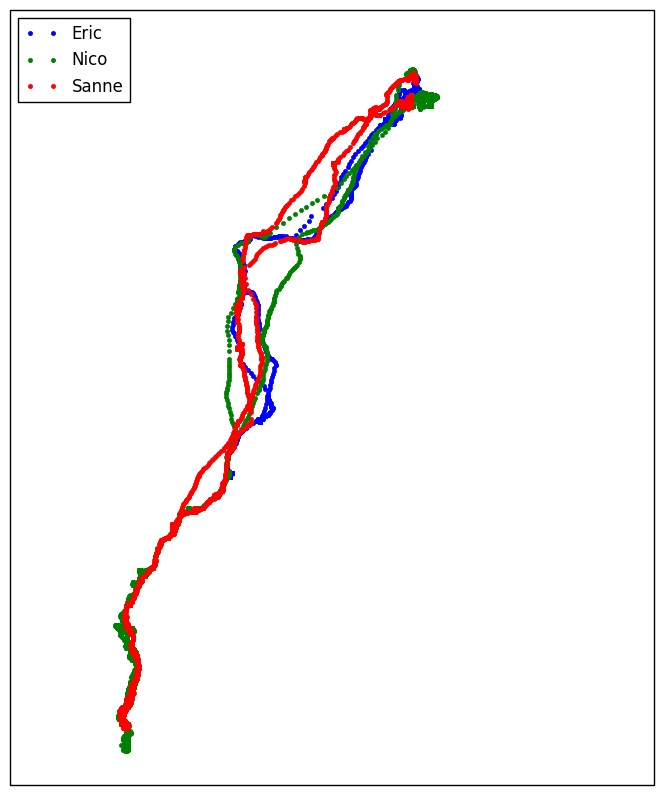

In [52]:
for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc = 'upper left')
plt.savefig('birds_info/map.pdf')
plt.show()

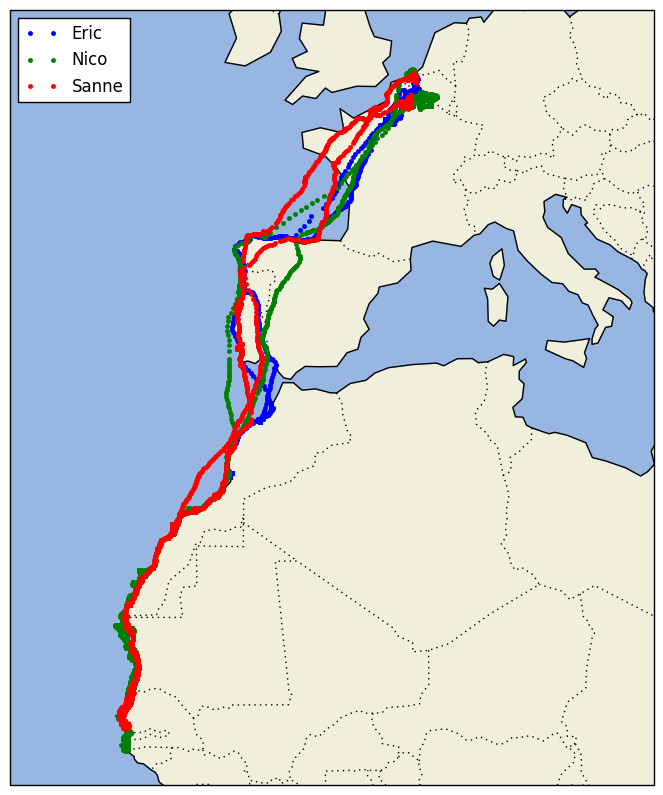

In [55]:
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ':')
ax.set_extent((-25.0, 20.0, 52.0, 10.0))


for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc = 'upper left')
plt.savefig('birds_info/map_2.pdf')
plt.show()

#### Using the Cartopy Library: Question 1

Looking at the cartopy plot from Video 4.2.6, do the birds in this dataset prefer to fly over land, sea, or the coast when migrating?

- Land
- Sea
- **The coast**